In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.linear_model
from sklearn.datasets.samples_generator import make_blobs

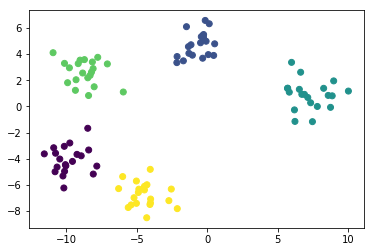

In [127]:
cent=5;
X, Y = make_blobs(n_samples=100, centers=cent, n_features=2)
X = np.mat(X.T)
Y = np.mat(Y.T)
m=Y.size
plt.scatter([X[0,:]],[X[1,:]],c=[Y])
Y_new = np.zeros((cent,Y.size))
for i in range(0,Y.size):
    Y_new[Y[0,i]][i]=1
Y=Y_new
n_x = X.shape[0]
n_y = Y.shape[0]

In [128]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z));

In [129]:
def init_param(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)*1
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*1
    b2 = np.zeros((n_y, 1))
    parameter = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    return parameter

In [130]:
def forward_propagation(X, parameter):
    W1 = parameter['W1']
    b1 = parameter['b1']
    W2 = parameter['W2']
    b2 = parameter['b2']
    
    Z1 = np.dot(W1, X) + b1;
    A1 = np.tanh(Z1);
    Z2 = np.dot(W2, A1) + b2;
    A2 = sigmoid(Z2);
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [131]:
def compute_cost(A2, Y):
    loss = -1/Y.size*np.sum(np.multiply(Y, np.log(A2)) + np.multiply(np.log(1-A2), 1-Y))
    return loss

In [132]:
def backward_propogation(parameter, cache, X, Y):
    m = Y.size
    W1 = parameter['W1']
    W2 = parameter['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = (1 / m) * np.sum(dZ2, axis=1)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, 1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = (1 / m) * np.sum(dZ1, axis=1)
    grad = {
        'dW1' : dW1,
        'dW2' : dW2,
        'db1' : db1,
        'db2' : db2
    }
    return grad


In [133]:
def update_param(parameter, grad, gamma = 1):
    W1 = parameter['W1']
    W2 = parameter['W2']
    b1 = parameter['b1']
    b2 = parameter['b2']
    
    dW1 = grad['dW1']
    dW2 = grad['dW2']
    db1 = grad['db1']
    db2 = grad['db2']
    
    W1 = W1 - gamma * dW1
    b1 = b1 - gamma * db1
    W2 = W2 - gamma * dW2
    b2 = b2 - gamma * db2
    
    parameter = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameter

In [134]:
def nn_model(X, Y, n_h, num_iterations=5):
    parameter = init_param(n_x, n_h, n_y)
    W1 = parameter['W1']
    b1 = parameter['b1']
    W2 = parameter['W2']
    b2 = parameter['b2']
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameter)
        cost = compute_cost(A2, Y)
        grad = backward_propogation(parameter, cache, X, Y)
        parameter = update_param(parameter, grad)
        if i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    return parameter

In [138]:
parameter = nn_model(X, Y, 10, num_iterations=10001)

Cost after iteration 0: 1.768004
Cost after iteration 1000: 0.005264
Cost after iteration 2000: 0.002584
Cost after iteration 3000: 0.001712
Cost after iteration 4000: 0.001279
Cost after iteration 5000: 0.001021
Cost after iteration 6000: 0.000850
Cost after iteration 7000: 0.000727
Cost after iteration 8000: 0.000636
Cost after iteration 9000: 0.000565
Cost after iteration 10000: 0.000508


In [139]:
def predict(parameter, X):

    A2, cache = forward_propagation(X, parameter)
    prediction = np.round(A2)
    return prediction

In [140]:
predictions = predict(parameter, X)
100-np.sum(np.abs(predictions-Y))

100.0